#THE SPARKS FOUNDATION

###INTERNSHIP TASK 6

### PREDICTION USING DECISION TREE ALGORITHM

### THE PURPOSE IS IF WE FEED ANY NEW DATA TO THE CLASSIFIER, IT WOULD BE ABLE TO PREDICT THE RIGHT CLASS ACCORDINGLY

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (4).csv


In [138]:
import io

data = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [139]:
data.shape

(150, 6)

In [140]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [141]:
X = data.drop(['Species'], axis = 1)
Y = data['Species']

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
train_x, val_x, train_y, val_y = train_test_split(X,Y, random_state = 101, stratify = Y, test_size = 0.25)

In [144]:
train_y.value_counts()

Iris-virginica     38
Iris-versicolor    37
Iris-setosa        37
Name: Species, dtype: int64

In [145]:
train_y.value_counts(normalize = True)


Iris-virginica     0.339286
Iris-versicolor    0.330357
Iris-setosa        0.330357
Name: Species, dtype: float64

In [146]:
val_y.value_counts(normalize = True)

Iris-setosa        0.342105
Iris-versicolor    0.342105
Iris-virginica     0.315789
Name: Species, dtype: float64

In [147]:
train_x.shape, train_y.shape

((112, 5), (112,))

In [148]:
val_x.shape, val_y.shape

((38, 5), (38,))

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
dt_model = DecisionTreeClassifier(random_state = 10)

In [151]:
dt_model.fit(train_x, train_y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [152]:
dt_model.score(train_x, train_y)

1.0

In [153]:
dt_model.score(val_x, val_y)

1.0

In [154]:
pred = dt_model.predict(val_x)
pred


array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [155]:
pd.DataFrame(pred).value_counts()

Iris-versicolor    13
Iris-setosa        13
Iris-virginica     12
dtype: int64

In [156]:
dt_model.predict_proba(val_x)


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
# changing the max_depth
train_acc = []
val_acc = []
for i in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth = i, random_state = 10)
    dt_model.fit(train_x, train_y)
    train_acc.append(dt_model.score(train_x, train_y))
    val_acc.append(dt_model.score(val_x, val_y))

In [159]:
frame = pd.DataFrame({'max depth': range(1,10), 'train accuracy': train_acc, 'validation accuracy': val_acc})

In [160]:
frame.head()

,max depth,train accuracy,validation accuracy
0,1,0.669643,0.657895
1,2,1.000000,1.000000
2,3,1.000000,1.000000
3,4,1.000000,1.000000
4,5,1.000000,1.000000


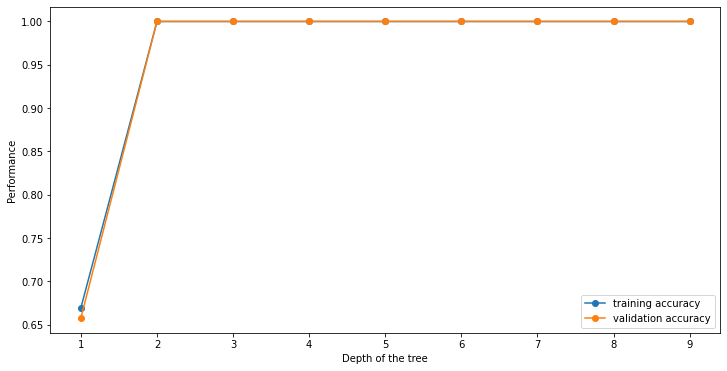

In [161]:
plt.figure(figsize = (12,6))
plt.plot(frame['max depth'], frame['train accuracy'], marker = 'o', label = 'training accuracy')
plt.plot(frame['max depth'], frame['validation accuracy'], marker = 'o', label = 'validation accuracy')
plt.xlabel('Depth of the tree')
plt.ylabel('Performance')
plt.legend()

In [162]:
dt_model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 25, random_state = 10)

In [170]:
dt_model.fit(val_x, val_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [171]:
dt_model.score(train_x, train_y)

0.9375

In [172]:
dt_model.score(val_x, val_y)

1.0

In [173]:
import graphviz
from sklearn import tree

In [174]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=val_x.columns,max_depth=2,filled=True)

In [175]:
!dot -Tpng tree.dot -o tree.png



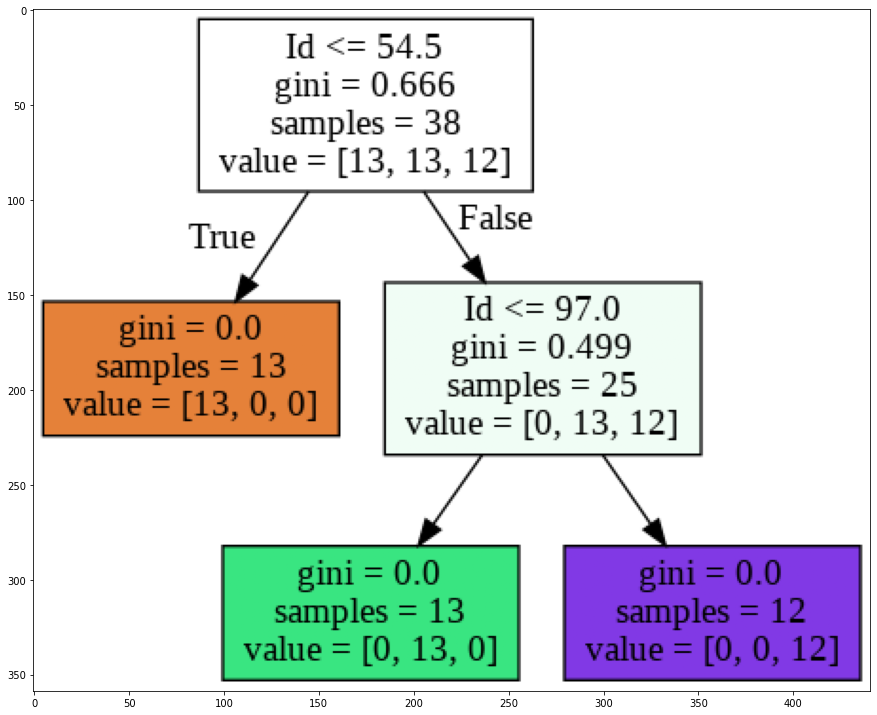

In [176]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)